In [1]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def keypointsAndDescriptors(img):
    brisk = cv2.BRISK_create()
    
    return brisk.detectAndCompute(img, None)

def hammingDistance(x,y):
    assert x.shape == y.shape

    return sum(el1 != el2 for el1, el2 in zip(x, y))

def ownMatcher(descriptor1, descriptor2):
    matches = []
    for i, el1 in enumerate(descriptor1):
        for j, el2 in enumerate(descriptor2):
            matches.append(cv2.DMatch(_distance=int(hammingDistance(el1,el2)),
                                      _imgIdx=0, _queryIdx=i, _trainIdx=j))
            
    matches = sorted(matches, key = lambda x: x.distance)
    
    return matches

In [3]:
def drawMatcher(image1, image2, descriptors1, descriptors2, keypoints1, keypoints2, useBFMatcher=False):
    plt.figure(figsize=(25,15)), plt.axis('off')
    
    if useBFMatcher:
        # Own Matcher
        title = 'OWN Matcher'
        matches = ownMatcher(descriptors1, descriptors2)
    else:
        # Brute Force Matcher
        title = 'Brute Force Matcher'
        bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
        matches = bf.match(descriptors1, descriptors2)
        matches = sorted(matches, key=lambda x: x.distance)
        

    match_img = cv2.drawMatches(image1, keypoints1,
                                image2, keypoints2,
                                matches[:20], None,
                                flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    
    plt.title(f'Use {title}', fontsize=30)
    plt.axis('off')
    plt.imshow(match_img), plt.show()

In [7]:
img1 = cv2.imread('car_1.png')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

img2 = cv2.imread('car_2.png')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

kp1, des1 = keypointsAndDescriptors(img1)
kp2, des2 = keypointsAndDescriptors(img2)

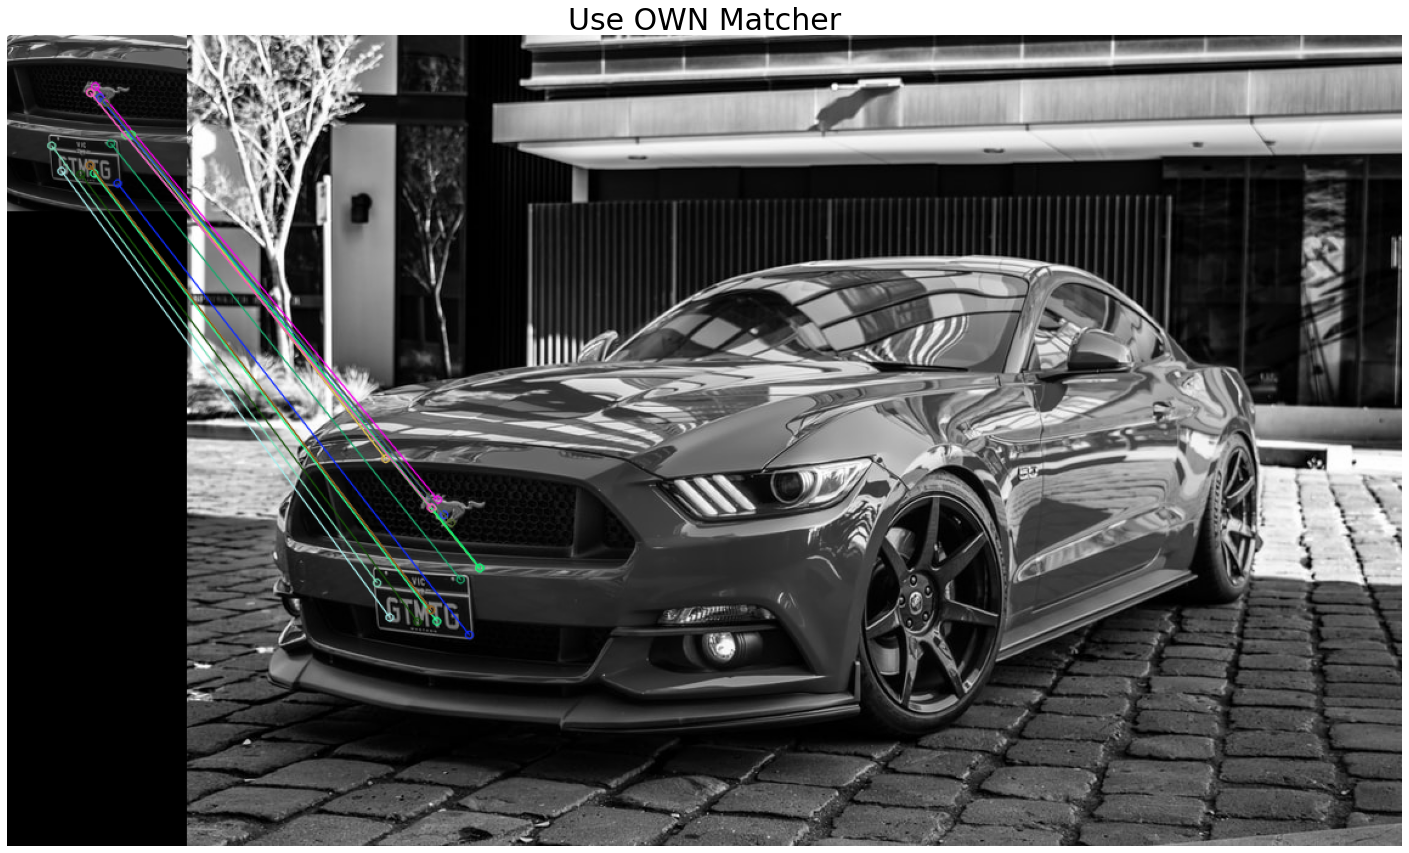

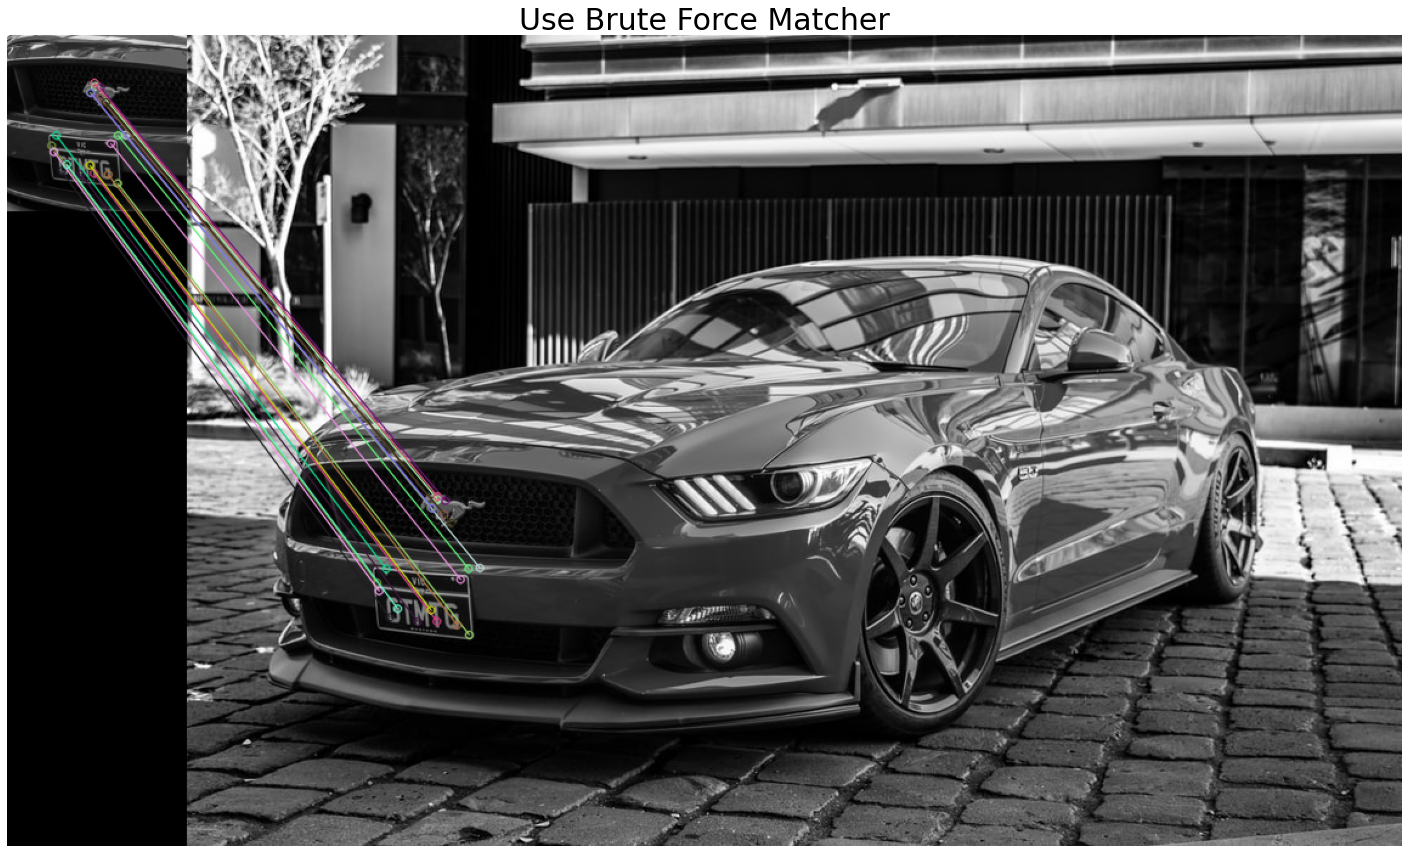

In [8]:
drawMatcher(img1, img2, des1, des2, kp1, kp2, True)
drawMatcher(img1, img2, des1, des2, kp1, kp2)
